## Laboratorium 3

* Metoda *k* Najbliższych Sąsiadów (*k*NN)
* Normalizacja
* Selekcja cech


### Opis
Celem laboratorium jest klasyfikacja liści za pomocą metody *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) z wykorzystaniem normalizacji oraz selekcji cech.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 dowolnych gatunków liści (będziesz je używać w kolejnych zadaniach) oraz wszystkie cechy (od 2-giej kolumny).
* Przeprowadź klasyfikację za pomocą klasyfikatora [*k*NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
* Znajdź optymalne *k*.
* Wyświetl dokładność klasyfikacji (*accuracy*).


In [1]:
 import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 with open('./dataset/dataset.npz', 'rb') as f:
     data = np.load(f)
     print(data.files)
     train, test = data['train'], data['test']

df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

train_new = df_train[df_train[0].isin([1.0, 2.0, 3.0 ,4.0 ,5.0, 6.0, 7.0, 8.0, 9.0 ,10.0])]
test_new = df_test[df_test[0].isin([1.0, 2.0, 3.0 ,4.0 ,5.0, 6.0, 7.0, 8.0, 9.0 ,10.0])]
X_train = train_new.iloc[:, 2:].values  
y_train = train_new.iloc[:, 0].values   

X_test = test_new.iloc[:, 2:].values  
y_test = test_new.iloc[:, 0].values



['train', 'test']


In [2]:
k_values = list(range(1, 10))  

best_k = 1
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Optymalne k: {best_k}")
print(f"Dokładność: {best_accuracy}")

Optymalne k: 9
Dokładność: 0.7524177949709865


### Zadanie 2
* Znormalizuj dane w zakresie 0-1. Możesz do tego celu wykorzystać gotową implementację [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) z biblioteki scikit-learn.
>    **Ważne: współczynniki powinny być obliczone na zbiorze treningowym i te same powinny zostać zastosowane do normalizacji zbioru testowego.**
* Ponownie wykonaj klasyfikację z taką samą konfiguracją (klasy, cechy, *k*), co w zadaniu 1, ale na danych znormalizowanych.
* Wyświetl dokładność klasyfikacji (*accuracy*).


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_n =scaler.fit_transform(X_train)
X_test_n= scaler.transform(X_test)

k_values = list(range(1, 10))  

best_k = 1
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_n, y_train)  
    y_pred = model.predict(X_test_n)  
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Optymalne k: {best_k}")
print(f"Dokładność: {best_accuracy}")

Optymalne k: 9
Dokładność: 0.804642166344294


### Zadanie 3
* Przeprowadź selekcję cech (wykonaj dla `{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}` cech). 
> Możesz wykorzystać bibliotekę [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Dla każdej liczby cech znajdź optymalne *k*.
* Wyświetl wykres, gdzie na osi X znajduje się liczba cech a na osi Y dokładność (*accuracy*).
* Znajdź najlepszą konfigurację (liczba cech, wartość *k*) i wyświetl jej wynik (*accuracy*).


Najlepsza dokładność dla 1 cech: 0.3694390715667311 przy k=9
Najlepsza dokładność dla 2 cech: 0.7001934235976789 przy k=7
Najlepsza dokładność dla 3 cech: 0.7098646034816247 przy k=6
Najlepsza dokładność dla 4 cech: 0.7330754352030948 przy k=8
Najlepsza dokładność dla 5 cech: 0.8027079303675049 przy k=8
Najlepsza dokładność dla 6 cech: 0.8085106382978723 przy k=7
Najlepsza dokładność dla 7 cech: 0.746615087040619 przy k=6
Najlepsza dokładność dla 8 cech: 0.758220502901354 przy k=8
Najlepsza dokładność dla 9 cech: 0.758220502901354 przy k=1
Najlepsza dokładność dla 10 cech: 0.758220502901354 przy k=4


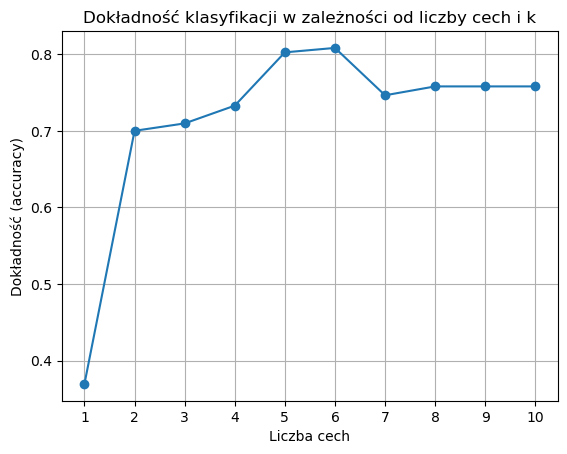

Najlepsza konfiguracja: 6 cech, k=7 osiągnęła dokładność: 0.8085106382978723


In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
acc = []
best_k_values = [] 
for k_features in range(1, 11):
    selector = SelectKBest(f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train_n, y_train)
    X_test_selected = selector.transform(X_test_n)

    best_accuracy = 0
    best_k = 1
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    
    acc.append(best_accuracy)
    best_k_values.append(best_k)
    print(f"Najlepsza dokładność dla {k_features} cech: {best_accuracy} przy k={best_k}")

plt.plot(range(1, 11), acc, marker='o')
plt.xlabel('Liczba cech')
plt.ylabel('Dokładność ')
plt.title('Dokładność klasyfikacji w zależności od liczby cech i k')
plt.xticks(range(1, 11))  
plt.grid(True)
plt.show()

best_k_features = np.argmax(acc) +1 
best_accuracy = acc[best_k_features -1 ]
best_k = best_k_values[best_k_features - 1]
print(f"Najlepsza konfiguracja: {best_k_features} cech, k={best_k} osiągnęła dokładność: {best_accuracy}")

### Zadanie 4

Napisz wnioski

In [5]:
"""
Dla podanych wartości możemy zauważyć, że zwiększanie liczby cech w celu poprawienia dokładności ma swoje ograniczenia. Najlepsza uzyskana konfiguracja 
wystąpiła dla 5 cech. Dalsze zwiększanie jej liczby nie przeniosło się na zwiększenie dokładności, lecz na pogorszenie otrzymywanych rezultatów.
"""

'\nDla podanych wartości możemy zauważyć, że zwiększanie liczby cech w celu poprawienia dokładności ma swoje ograniczenia. Najlepsza uzyskana konfiguracja \nwystąpiła dla 5 cech. Dalsze zwiększanie jej liczby nie przeniosło się na zwiększenie dokładności, lecz na pogorszenie otrzymywanych rezultatów.\n'